In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv(r"D:/Data/1-DATA SETS/supermarket_sales - Sheet1.CSV")
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [19]:
df.shape

(1000, 17)

In [22]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [7]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


Text(0.5, 1.0, 'Rating')

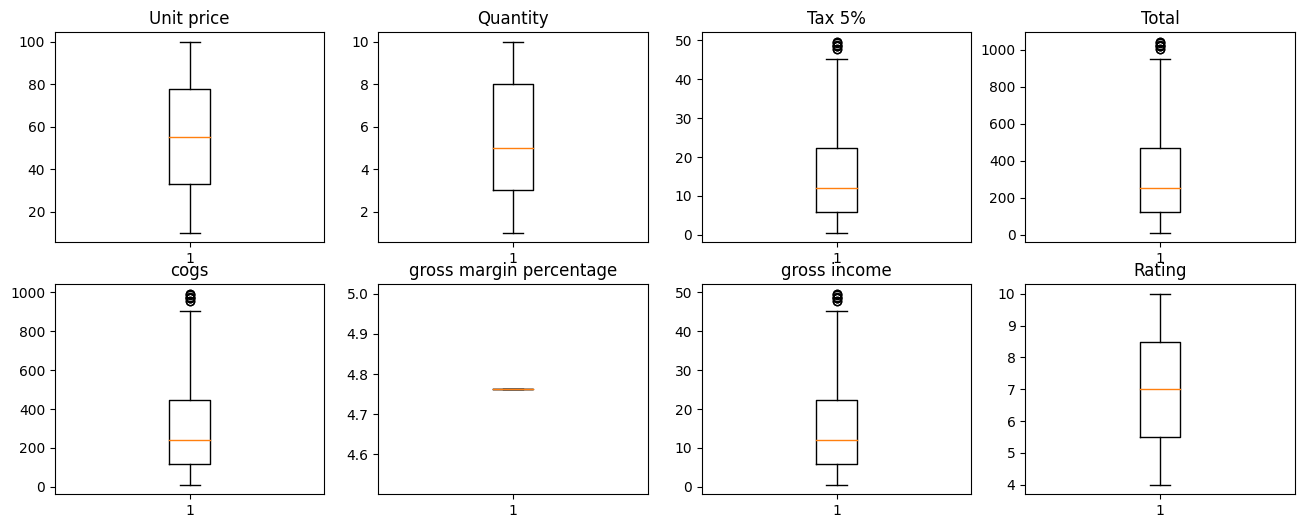

In [16]:
fig,ax=plt.subplots(2,4,figsize=(16,6))
ax[0,0].boxplot(x='Unit price',data=df)
ax[0,0].set_title('Unit price')
ax[0,1].boxplot(x='Quantity',data=df)
ax[0,1].set_title('Quantity')
ax[0,2].boxplot(x='Tax 5%',data=df)
ax[0,2].set_title('Tax 5%')
ax[0,3].boxplot(x='Total',data=df)
ax[0,3].set_title('Total')
ax[1,0].boxplot(x='cogs',data=df)
ax[1,0].set_title('cogs')
ax[1,1].boxplot(x='gross margin percentage',data=df)
ax[1,1].set_title('gross margin percentage')
ax[1,2].boxplot(x='gross income',data=df)
ax[1,2].set_title('gross income')
ax[1,3].boxplot(x='Rating',data=df)
ax[1,3].set_title('Rating')

# Removing outlier

In [36]:
Q25=df['Tax 5%'].quantile(0.25)
Q75=df['Tax 5%'].quantile(0.75)
IQR=Q75-Q25
min_v=Q25-1.5*IQR
max_v=Q75+1.5*IQR
data=df.loc[(df['Tax 5%']>=min_v) & (df['Tax 5%']<=max_v)]

In [39]:
Q25=df['Total'].quantile(0.25)
Q75=df['Total'].quantile(0.75)
IQR=Q75-Q25
min_v=Q25-1.5*IQR
max_v=Q75+1.5*IQR
data=df.loc[(df['Total']>=min_v) & (df['Total']<=max_v)]
#---------------------------------------------------------
Q25=df['cogs'].quantile(0.25)
Q75=df['cogs'].quantile(0.75)
IQR=Q75-Q25
min_v=Q25-1.5*IQR
max_v=Q75+1.5*IQR
data=df.loc[(df['cogs']>=min_v) & (df['cogs']<=max_v)]
#---------------------------------------------------------
Q25=df['gross income'].quantile(0.25)
Q75=df['gross income'].quantile(0.75)
IQR=Q75-Q25
min_v=Q25-1.5*IQR
max_v=Q75+1.5*IQR
data=df.loc[(df['gross income']>=min_v) & (df['gross income']<=max_v)]

In [40]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


Text(0.5, 1.0, 'Rating')

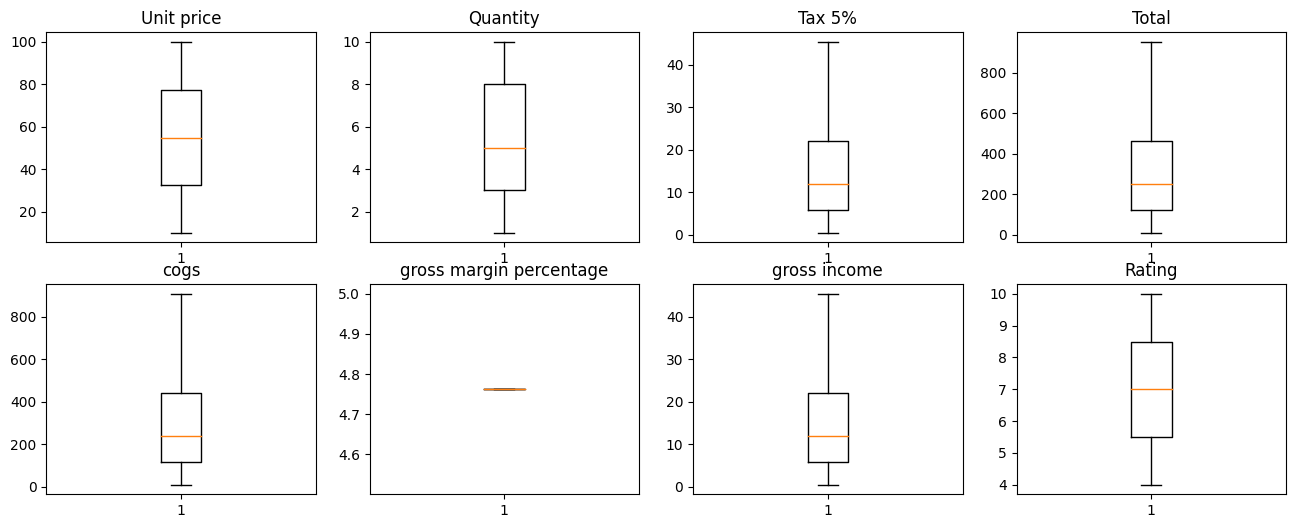

In [41]:
fig,ax=plt.subplots(2,4,figsize=(16,6))
ax[0,0].boxplot(x='Unit price',data=data)
ax[0,0].set_title('Unit price')
ax[0,1].boxplot(x='Quantity',data=data)
ax[0,1].set_title('Quantity')
ax[0,2].boxplot(x='Tax 5%',data=data)
ax[0,2].set_title('Tax 5%')
ax[0,3].boxplot(x='Total',data=data)
ax[0,3].set_title('Total')
ax[1,0].boxplot(x='cogs',data=data)
ax[1,0].set_title('cogs')
ax[1,1].boxplot(x='gross margin percentage',data=data)
ax[1,1].set_title('gross margin percentage')
ax[1,2].boxplot(x='gross income',data=data)
ax[1,2].set_title('gross income')
ax[1,3].boxplot(x='Rating',data=data)
ax[1,3].set_title('Rating')

In [72]:
data.loc[:,'Date']=pd.to_datetime(data['Date'])

In [77]:
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S')  
data['Time_c'] = data['Time'].dt.strftime("%H:%M:%S")

C:\Users\Amr\AppData\Local\Temp\ipykernel_968\364247578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S')
C:\Users\Amr\AppData\Local\Temp\ipykernel_968\364247578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time_c'] = data['Time'].dt.strftime("%H:%M:%S")


In [78]:
data.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
Time_c                             object
dtype: object

In [79]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Time_c
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 10:29:00,Cash,76.40,4.761905,3.8200,9.6,10:29:00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,13:23:00
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,20:33:00
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,10:37:00


In [80]:
data=data.drop('Time',axis=1)

In [81]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating,Time_c
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,4.761905,26.1415,9.1,13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,4.761905,3.8200,9.6,10:29:00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,4.761905,16.2155,7.4,13:23:00
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,4.761905,23.2880,8.4,20:33:00
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,Ewallet,604.17,4.761905,30.2085,5.3,10:37:00


# Answer Question

In [104]:
data[['gross income']].groupby(data['Branch']).sum().sort_values(by='gross income',ascending=False)

,gross income
Branch,
A,5007.6705
C,4973.4015
B,4959.6570


In [99]:
data['gross income'].sum()

14940.729

In [108]:
data.groupby(['Customer type'])[['gross income']].sum().sort_values(by='gross income',ascending=False)

,gross income
Customer type,
Member,7672.649
Normal,7268.080


In [136]:
data['Gender'].value_counts().to_frame()

,count
Gender,
Male,496
Female,495


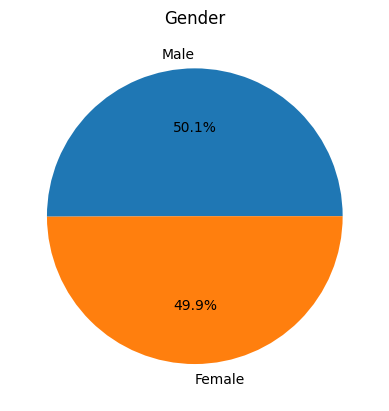

In [138]:
plt.pie(data['Gender'].value_counts().values,labels=data['Gender'].value_counts().index,autopct='%1.1f%%')
plt.title("Gender")
plt.show()

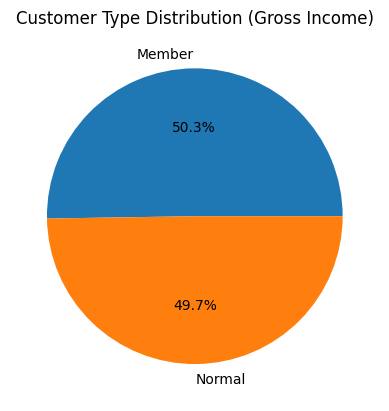

In [167]:
#total_gross_income = [data['gross income'].sum()]  # Wrap the sum in a list
plt.pie(data['Customer type'].value_counts().values, labels=data['Customer type'].value_counts().index, autopct='%1.1f%%')
plt.title('Customer Type Distribution (Gross Income)')
plt.show()

In [175]:
data[['gross income']].groupby(data['City']).sum().sort_values(by='gross income',ascending=False)

,gross income
City,
Yangon,5007.6705
Naypyitaw,4973.4015
Mandalay,4959.6570


In [177]:
data.groupby(['Payment'])[['gross income']].sum().sort_values(by='gross income',ascending=False)

,gross income
Payment,
Cash,5247.660
Ewallet,5091.067
Credit card,4602.002


In [181]:
data_num=data.loc[:,['Unit price','Quantity','Tax 5%','Total','cogs','gross income','Rating']]
data_num

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
0,74.69,7,26.1415,548.9715,522.83,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,30.2085,5.3
...,...,...,...,...,...,...,...
994,60.95,1,3.0475,63.9975,60.95,3.0475,5.9
995,40.35,1,2.0175,42.3675,40.35,2.0175,6.2
997,31.84,1,1.5920,33.4320,31.84,1.5920,7.7
998,65.82,1,3.2910,69.1110,65.82,3.2910,4.1


In [182]:
c=data_num.corr()
c

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
Unit price,1.000000,-0.011506,0.623355,0.623355,0.623355,0.623355,-0.002527
Quantity,-0.011506,1.000000,0.699290,0.699290,0.699290,0.699290,-0.009694
Tax 5%,0.623355,0.699290,1.000000,1.000000,1.000000,1.000000,-0.026092
Total,0.623355,0.699290,1.000000,1.000000,1.000000,1.000000,-0.026092
cogs,0.623355,0.699290,1.000000,1.000000,1.000000,1.000000,-0.026092
gross income,0.623355,0.699290,1.000000,1.000000,1.000000,1.000000,-0.026092
Rating,-0.002527,-0.009694,-0.026092,-0.026092,-0.026092,-0.026092,1.000000


<Axes: >

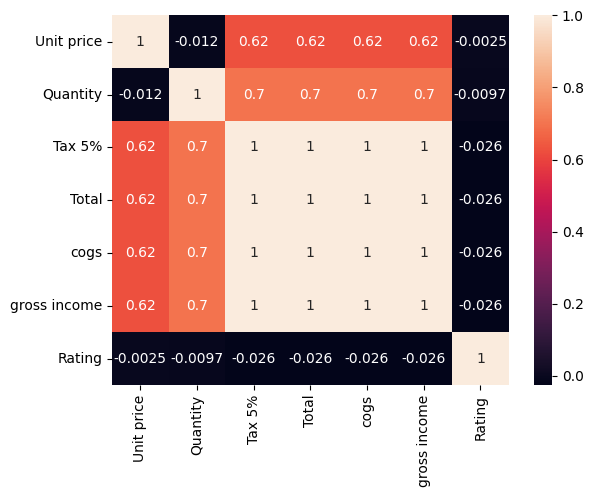

In [183]:
sns.heatmap(c,annot=True)

In [187]:
data.groupby(['Gender'])[['gross income']].sum()

,gross income
Gender,
Female,7701.815
Male,7238.914


In [190]:
product=data.groupby(['Product line'])[['gross income']].sum()

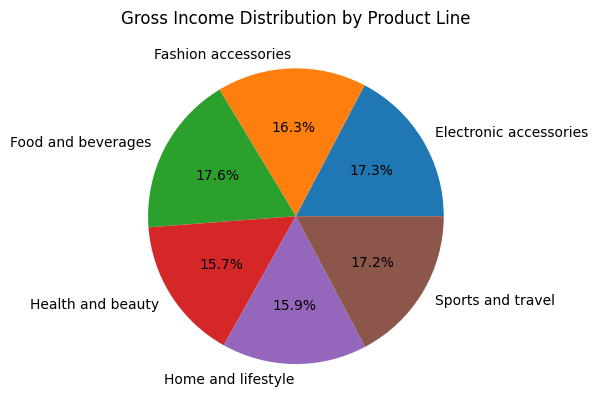

In [193]:
plt.pie(product.values.flatten(),labels=product.index,autopct='%1.1f%%')
plt.title("Gross Income Distribution by Product Line")
plt.show()

In [198]:
data.groupby(['Product line'])[['Rating']].mean().sort_values(by='Rating',ascending=False)

,Rating
Product line,
Food and beverages,7.128324
Fashion accessories,7.012571
Health and beauty,7.003289
Sports and travel,6.926667
Electronic accessories,6.924706
Home and lifestyle,6.871154


In [199]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating,Time_c
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,4.761905,26.1415,9.1,13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,4.761905,3.8200,9.6,10:29:00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,4.761905,16.2155,7.4,13:23:00
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,4.761905,23.2880,8.4,20:33:00
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,Ewallet,604.17,4.761905,30.2085,5.3,10:37:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2019-02-18,Ewallet,60.95,4.761905,3.0475,5.9,11:40:00
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,Ewallet,40.35,4.761905,2.0175,6.2,13:46:00
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,Cash,31.84,4.761905,1.5920,7.7,13:22:00
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,Cash,65.82,4.761905,3.2910,4.1,15:33:00


In [210]:
data.groupby(['City'])[['Quantity','gross income']].sum().sort_values(by='Quantity',ascending=False)

,Quantity,gross income
City,,
Yangon,1849,5007.6705
Mandalay,1800,4959.6570
Naypyitaw,1771,4973.4015


In [212]:
data.groupby('Product line').agg({'Tax 5%':'sum','gross income':'sum'})

,Tax 5%,gross income
Product line,,
Electronic accessories,2587.5015,2587.5015
Fashion accessories,2438.2500,2438.2500
Food and beverages,2624.3040,2624.3040
Health and beauty,2342.5590,2342.5590
Home and lifestyle,2370.9380,2370.9380
Sports and travel,2577.1765,2577.1765


In [214]:
data['month']=data['Date'].dt.month

In [215]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating,Time_c,month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,4.761905,26.1415,9.1,13:08:00,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,4.761905,3.8200,9.6,10:29:00,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,4.761905,16.2155,7.4,13:23:00,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,4.761905,23.2880,8.4,20:33:00,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,Ewallet,604.17,4.761905,30.2085,5.3,10:37:00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2019-02-18,Ewallet,60.95,4.761905,3.0475,5.9,11:40:00,2
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,Ewallet,40.35,4.761905,2.0175,6.2,13:46:00,1
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,Cash,31.84,4.761905,1.5920,7.7,13:22:00,2
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,Cash,65.82,4.761905,3.2910,4.1,15:33:00,2


In [218]:
month_income=data.groupby('month')[['gross income']].sum().sort_values(by='gross income',ascending=False)
month_income

,gross income
month,
1,5295.503
3,5163.477
2,4481.749


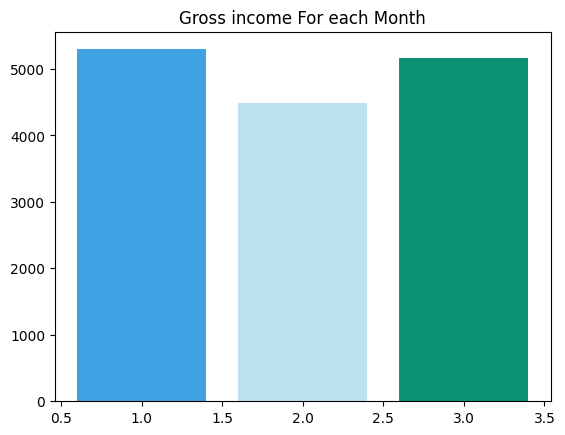

In [236]:
plt.title("Gross income For each Month")
plt.bar(month_income.index, month_income.values.flatten(), color=['#40A2E3','#0D9276','#BBE2EC'])
plt.show()

In [239]:
data['Time_c']=pd.to_datetime(data['Time_c'])
data.loc[:,'Time_c']=data['Time_c'].dt.floor('3H')

In [242]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating,Time_c,month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,4.761905,26.1415,9.1,12:00:00,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,4.761905,3.8200,9.6,09:00:00,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,4.761905,16.2155,7.4,12:00:00,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,4.761905,23.2880,8.4,18:00:00,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,Ewallet,604.17,4.761905,30.2085,5.3,09:00:00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2019-02-18,Ewallet,60.95,4.761905,3.0475,5.9,09:00:00,2
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,Ewallet,40.35,4.761905,2.0175,6.2,12:00:00,1
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,Cash,31.84,4.761905,1.5920,7.7,12:00:00,2
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,Cash,65.82,4.761905,3.2910,4.1,15:00:00,2


In [241]:
data['Time_c']=data['Time_c'].dt.time

In [253]:
data.groupby(['Time_c'])[['gross income']].sum().sort_values(by='gross income',ascending=False)

,gross income
Time_c,
18:00:00,4174.5200
12:00:00,4120.2885
15:00:00,3703.1200
09:00:00,2942.8005


In [260]:
data.to_csv("D:/Data/1-DATA SETS/new.csv")